# FINAL PROJECT 3

- Nama : Umniya Zahra 
- Kode Peserta : PYTN-KS15-004

heart_fail ini memiliki 13 kolom variabel dan 299 baris. Sumber heart_fail dari : https://www.kaggle.com/heart_failsets/andrewmvd/heart-failure-clinical-heart_fail. Prediksi keselamatan pasien dari penyakit jantung.


# Import Pustaka

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report



# Data Loading

In [38]:
heart_fail = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [39]:
heart_fail #melihat data dari variabel heart_fail

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [40]:
# melihat ukuran dataset
heart_fail.shape

(299, 13)

terdiri dari 299 baris, dan 13 kolom

In [41]:
heart_fail.info() # melihat info data, nilai null dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [42]:
# melihat data statistik deskriptif
heart_fail.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# Data Cleaning

In [43]:
# merubah nilai kosong, strip, dan 0 menjadi nan.
heart_fail.replace(' ', np.nan, inplace=True)
heart_fail.replace('-', np.nan, inplace=True)

In [44]:
# mengetahui jumlah nilai yang duplikat dalam dataset
heart_fail.duplicated().sum().sum()

0

Tidak ada data duplikat

In [45]:
# mengetahui jumlah nilai null dalam dataset
heart_fail.isna().sum().sum()

0

tidak ada nilai null

In [46]:
# informasi statistik
heart_fail.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Dari hasil data cleaning di atas tidak ditemukan adanya null.

# Explorasi Data

### 1. Korelasi Data

In [47]:
# melihat korelasi data
heart_fail.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


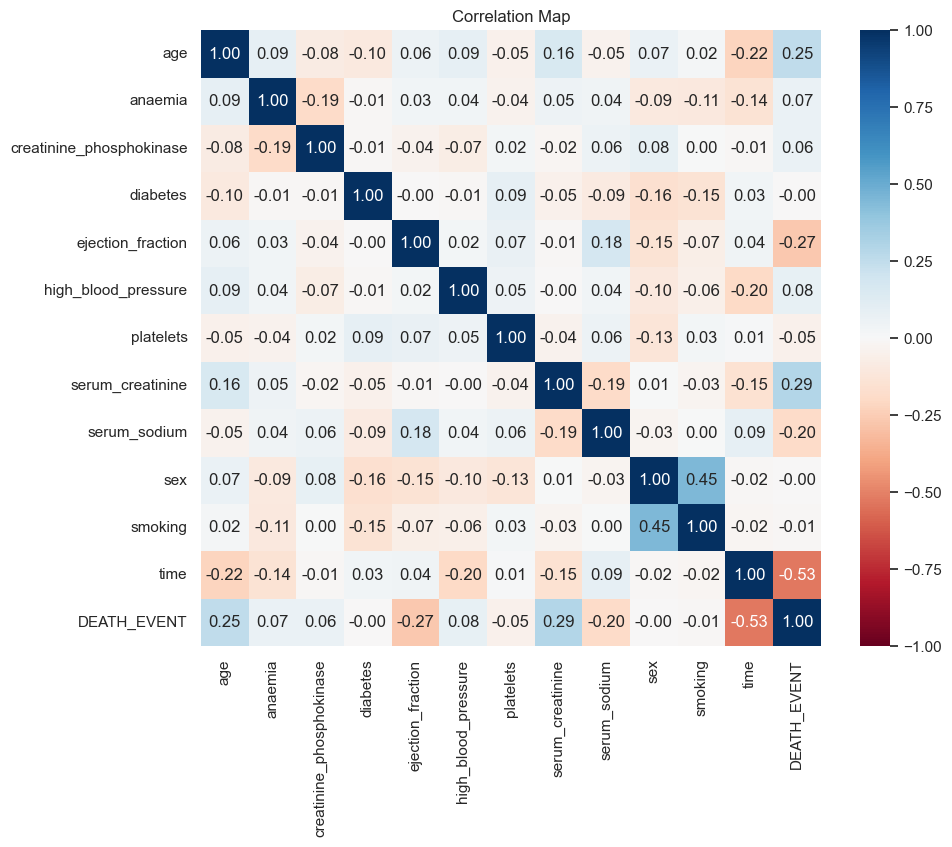

In [48]:
# Membuat heatmap
plt.figure(figsize=(10,8))
sns.heatmap(heart_fail.corr(), annot=True, fmt=".2f", vmin=-1, cmap='RdBu')
plt.title("Correlation Map")
plt.show()

1. Terdapat hubungan berbanding terbalik dari kejadian kematian dan usia, dimana kejadian kematian banyak terjadi pada pasien berusia tua.

2. Terdapat hubungan antara penggunaan serum creatinine dan serum sodium dengan kejadian kematian, dimana kejadian kematian banyak terjadi pada penggunaan serum creatinine yang tinggi dan serum sodium yang rendah.

3. Terdapat hubungan antara ejection fraction dan kejadian kematian, dimana kejadian kematian banyak terjadi pada pasian dengan ejection fraction yang rendah.

4. Terdapat hubungan antara periode pemantauan dengan kejadian kematian, dimana kejadian kematian banyak terjadi pada pasien dengan periode mantauan yang singkat.



### 2. Distribusi Usia Pasien

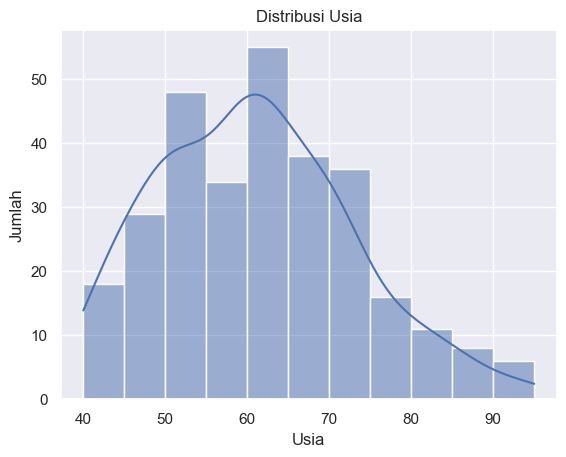

In [49]:
# Histogram untuk melihat distribusi variabel numerik
sns.histplot(heart_fail['age'], kde=True, bins=11)
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.title('Distribusi Usia')
plt.show()

Histogram di atas menapilkan distribusi data usia pasien. Dimana didapatkan data pasien yang paling banyak berada pada rentang usia 50-55 tahun dan 60-65 tahun. Tetapi secara garis besar data didominasi oleh pasien berusia 60 tahuanan.

### 3. Jumlah Kejadian Kematian

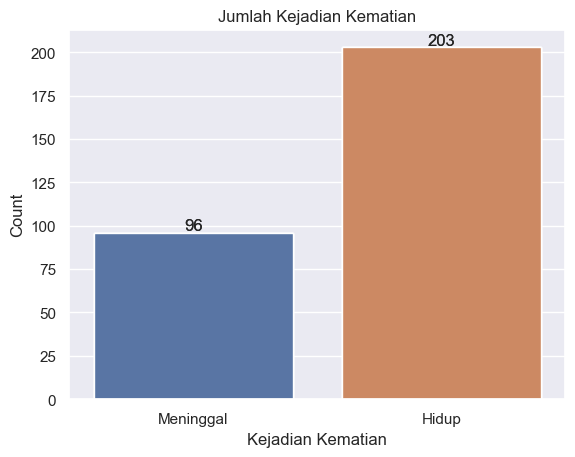

In [50]:
kematian = heart_fail['DEATH_EVENT'].replace({0: 'Hidup', 1: 'Meninggal'})

sns.countplot(x=kematian)

for p in sns.countplot(x=kematian).patches:
    sns.countplot(x=kematian).annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.xlabel('Kejadian Kematian')
plt.ylabel('Count')
plt.title('Jumlah Kejadian Kematian')
plt.show()

Gambar di atas menampilkan data jumlah kejadian kematian, dimana didapatkan data pasien yang mengalami kematian ada 96 pasien, dan pasien yang teteap hidup ada 203 pasien.

### 4. Distribusi Usia Berdasarkan Kejadian Kematian

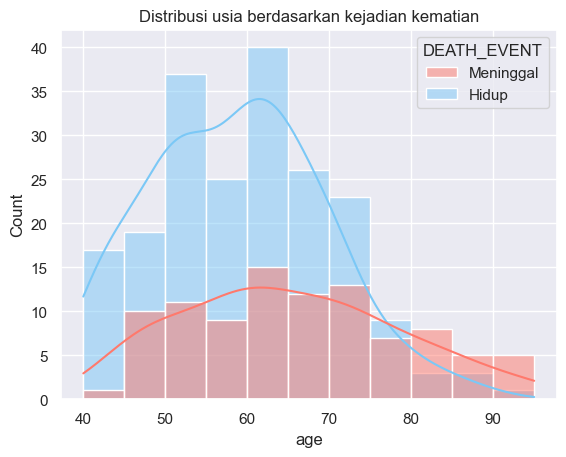

In [51]:
sns.set(style="darkgrid")
sns.histplot(x="age",bins=11, hue=kematian, data=heart_fail, kde=True, palette=['#FF796C', '#7BC8F6'])
plt.title("Distribusi usia berdasarkan kejadian kematian")
# plt.legend()
plt.show()

Gambar di atas menampilkan data distribusi usia dengan perbandingan antara pasien yang meninggal dan hidup. Didapatkan bahwa kebanyakan pasien yang tetap hidup adalah pasien dengan usia dibawah 75 tahun. Sedangkan kejadian kematian ditemui hampir di seluruh rentang usia dengan jumlah yang relatif sama, tetapi yang paling banya terjadi pada rentang 60-65 tahun. 

### 4. Jumlah Pasien Berdasarkan Gender

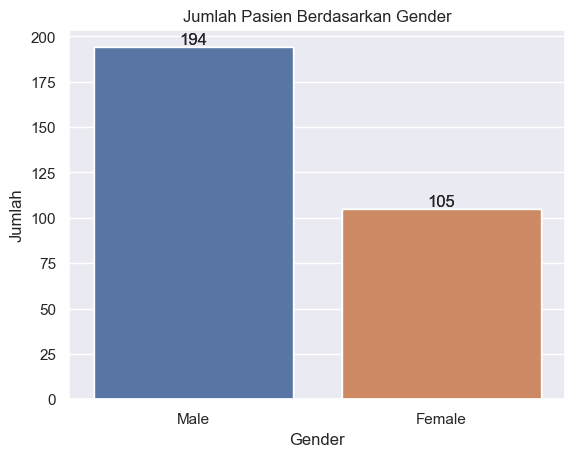

In [52]:
# Count plot untuk melihat distribusi variabel kategorikal
gender = heart_fail['sex'].replace({1 : 'Male', 0 : 'Female'})

sns.countplot(x=gender)

for p in sns.countplot(x=gender).patches:
    sns.countplot(x=gender).annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.ylabel('Jumlah')
plt.xlabel('Gender')
plt.title('Jumlah Pasien Berdasarkan Gender')
plt.show()

### 5. Usia vs Kejadian kematian

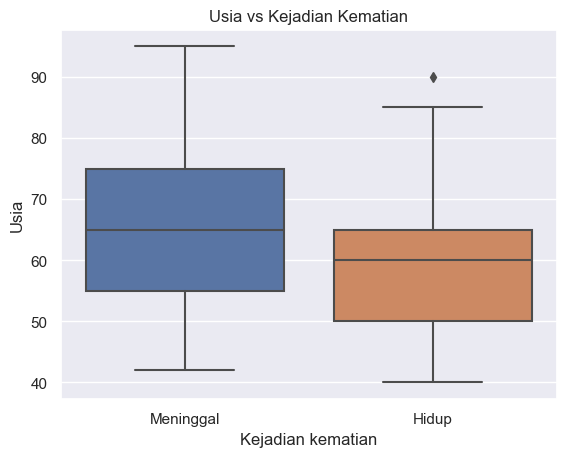

In [53]:
sns.boxplot(x=kematian, y='age', data=heart_fail)
plt.xlabel('Kejadian kematian')
plt.ylabel('Usia')
plt.title('Usia vs Kejadian Kematian')
plt.show()

Dari gambar di atas ditampilkan persebaran data antara pasien yang meninggal dan hidup berdasarkan usia. Terdapat rentang data yang lebih lebar pada data pasien yang mengalami kematian, dimana kejadian kematian didominasi pasien berusia 55 - 75 tahun. Sedangkan pada pasien yang bertahan hidup lebih didominasi pasien yang berusia lebih muda, yaitu pada rentang 50 - 65 tahun. 

### 6. Distribusi Data Pasien yang dapat bertahan berdasarkan Gender

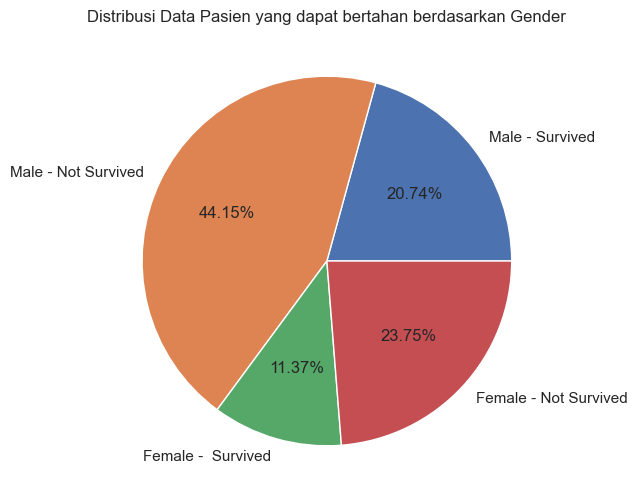

In [54]:


male = heart_fail.loc[heart_fail["sex"]==1]
female = heart_fail.loc[heart_fail["sex"]==0]

male_survi = male.loc[heart_fail["DEATH_EVENT"]==1]
male_not = male.loc[heart_fail["DEATH_EVENT"]==0]
female_survi = female.loc[heart_fail["DEATH_EVENT"]==1]
female_not = female.loc[heart_fail["DEATH_EVENT"]==0]

label = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]

values = [len(male_survi), len(male_not), len(female_survi), len(female_not)]

plt.figure(figsize=(6,6))
plt.pie(values, labels=label,autopct='%1.2f%%')
plt.title("Distribusi Data Pasien yang dapat bertahan berdasarkan Gender")
plt.show()

Gambar diatas menampilkan grafik distribusi data pasien yang bertahan berdasarkan gender. Dimana didapatkan data pasein pria yang berhasil bertahan sebanyak 20,74 % dan pasein wanita yang berhasil bertahan sebanyak 11,37 %. Data di atas didominasi pasien yang meninggal terutama pada gender laki-laki yaitu sebesar 44,15 %.

# Data Preprocessing

In [55]:
# Memisahkan fitur dan target
X = heart_fail.drop('DEATH_EVENT', axis=1)
Y = heart_fail['DEATH_EVENT']

In [56]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [57]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10
183,75.000,0,99,0,38,1,224000.00,2.50,134,1,0,162
185,60.667,1,104,1,30,0,389000.00,1.50,136,1,0,171
146,52.000,0,132,0,30,0,218000.00,0.70,136,1,1,112
30,94.000,0,582,1,38,1,263358.03,1.83,134,1,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...
188,60.667,1,151,1,40,1,201000.00,1.00,136,0,0,172
71,58.000,0,582,1,35,0,122000.00,0.90,139,1,1,71
106,55.000,0,748,0,45,0,263000.00,1.30,137,1,0,88
270,44.000,0,582,1,30,1,263358.03,1.60,130,1,1,244


tampilkan outlier

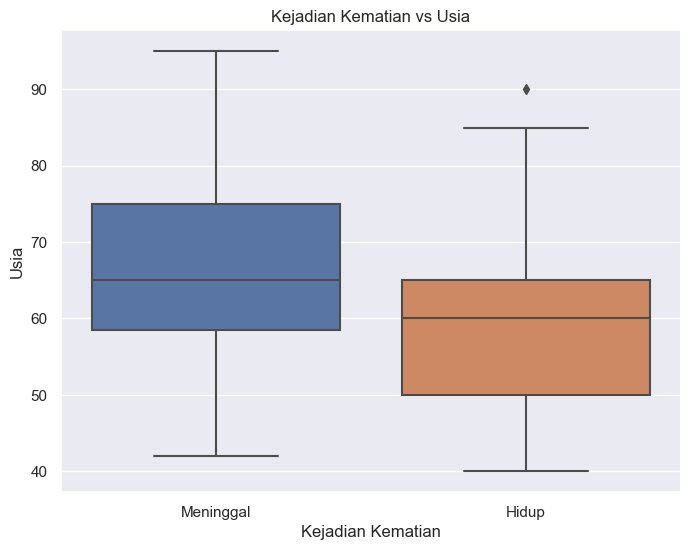

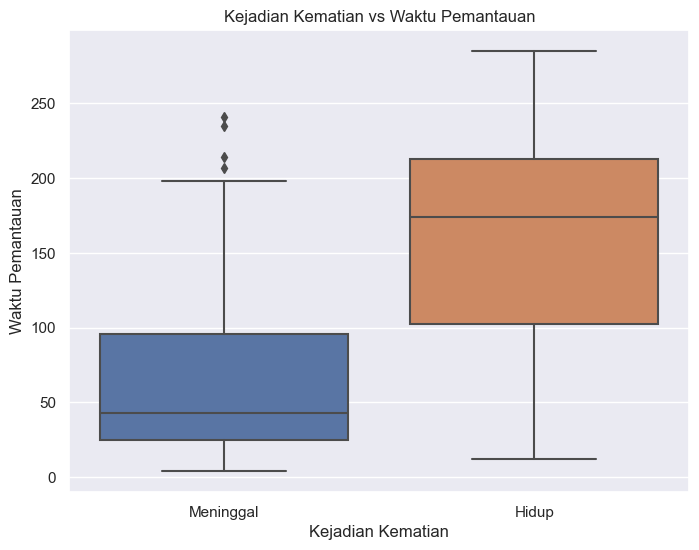

In [58]:
# Menggabungkan fitur "age" dan target "DEATH_EVENT" menjadi satu DataFrame
df_boxplot = X_train.copy()
df_boxplot['DEATH_EVENT'] = Y_train

# Mengubah label pada target menjadi "Hidup" dan "Meninggal"
df_boxplot['DEATH_EVENT'] = df_boxplot['DEATH_EVENT'].map({0: 'Hidup', 1: 'Meninggal'})

# Membuat box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='age', data=df_boxplot)
plt.xlabel('Kejadian Kematian')
plt.ylabel('Usia')
plt.title('Kejadian Kematian vs Usia')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='time', data=df_boxplot)
plt.xlabel('Kejadian Kematian')
plt.ylabel('Waktu Pemantauan')
plt.title('Kejadian Kematian vs Waktu Pemantauan')
plt.show()

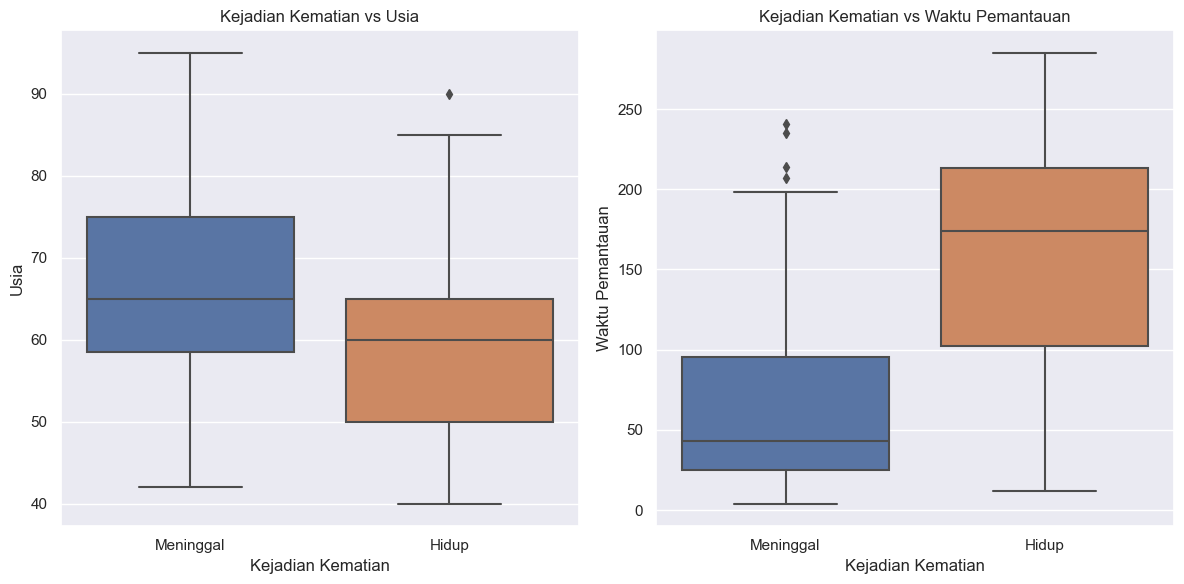

In [59]:
# Menggabungkan fitur "age" dan target "DEATH_EVENT" menjadi satu DataFrame
df_boxplot = X_train.copy()
df_boxplot['DEATH_EVENT'] = Y_train

# Mengubah label pada target menjadi "Hidup" dan "Meninggal"
df_boxplot['DEATH_EVENT'] = df_boxplot['DEATH_EVENT'].map({0: 'Hidup', 1: 'Meninggal'})

# Membuat subplot dengan 1 baris dan 2 kolom
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Box plot Kejadian Kematian vs Usia
sns.boxplot(x='DEATH_EVENT', y='age', data=df_boxplot, ax=axs[0])
axs[0].set_xlabel('Kejadian Kematian')
axs[0].set_ylabel('Usia')
axs[0].set_title('Kejadian Kematian vs Usia')

# Box plot Kejadian Kematian vs Waktu Pemantauan
sns.boxplot(x='DEATH_EVENT', y='time', data=df_boxplot, ax=axs[1])
axs[1].set_xlabel('Kejadian Kematian')
axs[1].set_ylabel('Waktu Pemantauan')
axs[1].set_title('Kejadian Kematian vs Waktu Pemantauan')

plt.tight_layout()
plt.show()


Gambar di atas menampilkan sebaran data kejadian kematian berdasarkan usia dan waktu pemantauan. Pada kasus data ini terdapat outlier, akan tetapi outlier tidak dihilangkan karena merupakan bagian dari distribusi data yang sebenarnya, mempertahankan outlier dapat membantu mewakili variasi yang ada dalam populasi yang diamati. Outlier dapat memiliki informasi yang bernilai dan relevan

In [60]:
# Penanganan Ketidakseimbangan Kelas
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [61]:
pd.DataFrame(X_train_resampled)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.000000,1,246,0,15,0,127000.000000,1.200000,137,1,0,10
1,75.000000,0,99,0,38,1,224000.000000,2.500000,134,1,0,162
2,60.667000,1,104,1,30,0,389000.000000,1.500000,136,1,0,171
3,52.000000,0,132,0,30,0,218000.000000,0.700000,136,1,1,112
4,94.000000,0,582,1,38,1,263358.030000,1.830000,134,1,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...
331,54.893522,0,492,0,29,0,324357.746841,2.117972,139,0,0,41
332,62.437824,1,249,0,38,0,255632.028390,2.082623,132,0,0,42
333,69.988185,0,502,0,35,0,227341.209982,3.335302,134,1,0,51
334,54.132481,0,587,0,20,0,321566.240520,1.613248,129,0,0,39


In [62]:
# Normalisasi atau Penskalaan Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [63]:
# Pemilihan Fitur
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=5)  # Memilih 5 fitur terbaik
X_train_selected = selector.fit_transform(X_train_scaled, Y_train_resampled)
X_test_selected = selector.transform(X_test_scaled)

In [64]:
selector.get_feature_names_out()

array(['x3', 'x7', 'x9', 'x10', 'x11'], dtype=object)

# Pendefinisian Model

In [65]:
# Inisialisasi model

logreg_model = LogisticRegression()
knn_model = KNeighborsClassifier()
svm_model = SVC()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
nb_model = GaussianNB()

# Pelatihan Model

### 1. Logistic Regression

In [66]:
# Melatih dan mengevaluasi Logistic Regression
logreg_model.fit(X_train_selected, Y_train_resampled)
logreg_pred = logreg_model.predict(X_test_selected)
print("Model: Logistic Regression")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, logreg_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, logreg_pred))
print("=====================\n")

Model: Logistic Regression
Confusion Matrix:
[[25 10]
 [10 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        35
           1       0.60      0.60      0.60        25

    accuracy                           0.67        60
   macro avg       0.66      0.66      0.66        60
weighted avg       0.67      0.67      0.67        60




### 2. KNN

In [67]:
# Melatih dan mengevaluasi K-Nearest Neighbors (KNN)
knn_model.fit(X_train_selected, Y_train_resampled)
knn_pred = knn_model.predict(X_test_selected)
print("Model: K-Nearest Neighbors (KNN)")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, knn_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, knn_pred))
print("=====================\n")

Model: K-Nearest Neighbors (KNN)
Confusion Matrix:
[[29  6]
 [13 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        35
           1       0.67      0.48      0.56        25

    accuracy                           0.68        60
   macro avg       0.68      0.65      0.66        60
weighted avg       0.68      0.68      0.67        60




### 3. SVM

In [68]:
# Melatih dan mengevaluasi Support Vector Machine (SVM)
svm_model.fit(X_train_selected, Y_train_resampled)
svm_pred = svm_model.predict(X_test_selected)
print("Model: Support Vector Machine (SVM)")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, svm_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, svm_pred))
print("=====================\n")

Model: Support Vector Machine (SVM)
Confusion Matrix:
[[26  9]
 [12 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        35
           1       0.59      0.52      0.55        25

    accuracy                           0.65        60
   macro avg       0.64      0.63      0.63        60
weighted avg       0.65      0.65      0.65        60




### 4. Decision Tree

In [69]:
# Melatih dan mengevaluasi Decision Tree
dt_model.fit(X_train_selected, Y_train_resampled)
dt_pred = dt_model.predict(X_test_selected)
print("Model: Decision Tree")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, dt_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, dt_pred))
print("=====================\n")

Model: Decision Tree
Confusion Matrix:
[[26  9]
 [13 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        35
           1       0.57      0.48      0.52        25

    accuracy                           0.63        60
   macro avg       0.62      0.61      0.61        60
weighted avg       0.63      0.63      0.63        60




### 5. Random Forest

In [70]:
# Melatih dan mengevaluasi Random Forest
rf_model.fit(X_train_selected, Y_train_resampled)
rf_pred = rf_model.predict(X_test_selected)
print("Model: Random Forest")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, rf_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, rf_pred))
print("=====================\n")

Model: Random Forest
Confusion Matrix:
[[28  7]
 [ 9 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.70      0.64      0.67        25

    accuracy                           0.73        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.73      0.73      0.73        60




### 6. Naive Bayes

In [71]:
# Melatih dan mengevaluasi Naive Bayes
nb_model.fit(X_train_selected, Y_train_resampled)
nb_pred = nb_model.predict(X_test_selected)
print("Model: Naive Bayes")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, nb_pred))
print()
print("Classification Report:")
print(classification_report(Y_test, nb_pred))
print("=====================\n")

Model: Naive Bayes
Confusion Matrix:
[[29  6]
 [15 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.83      0.73        35
           1       0.62      0.40      0.49        25

    accuracy                           0.65        60
   macro avg       0.64      0.61      0.61        60
weighted avg       0.64      0.65      0.63        60




In [72]:
# Inisialisasi model
models = [
    "Logistic Regression",
    "K-Nearest Neighbors (KNN)",
    "Support Vector Machine (SVM)",
    "Decision Tree",
    "Random Forest",
    "Naive Bayes"
]

# Confusion Matrix
confusion_matrices = [
    confusion_matrix(Y_test, logreg_pred),
    confusion_matrix(Y_test, knn_pred),
    confusion_matrix(Y_test, svm_pred),
    confusion_matrix(Y_test, dt_pred),
    confusion_matrix(Y_test, rf_pred),
    confusion_matrix(Y_test, nb_pred)
]

# Classification Report
classification_reports = [
    classification_report(Y_test, logreg_pred, output_dict=True),
    classification_report(Y_test, knn_pred, output_dict=True),
    classification_report(Y_test, svm_pred, output_dict=True),
    classification_report(Y_test, dt_pred, output_dict=True),
    classification_report(Y_test, rf_pred, output_dict=True),
    classification_report(Y_test, nb_pred, output_dict=True)
]


import pandas as pd

# Membuat DataFrame
df_results = pd.DataFrame({
    'Model': models,
    'Confusion Matrix': confusion_matrices,
    'Classification Report': classification_reports
})

# Memisahkan metrik-metrik evaluasi
df_results['Precision (0)'] = df_results['Classification Report'].apply(lambda x: x['0']['precision'])
df_results['Precision (1)'] = df_results['Classification Report'].apply(lambda x: x['1']['precision'])
df_results['Recall (0)'] = df_results['Classification Report'].apply(lambda x: x['0']['recall'])
df_results['Recall (1)'] = df_results['Classification Report'].apply(lambda x: x['1']['recall'])
df_results['F1-score (0)'] = df_results['Classification Report'].apply(lambda x: x['0']['f1-score'])
df_results['F1-score (1)'] = df_results['Classification Report'].apply(lambda x: x['1']['f1-score'])

# Menghapus kolom 'Classification Report' yang tidak diperlukan
df_results.drop('Classification Report', axis=1, inplace=True)

# Menampilkan DataFrame
df_results


,Model,Confusion Matrix,Precision (0),Precision (1),Recall (0),Recall (1),F1-score (0),F1-score (1)
0,Logistic Regression,"[[25, 10], [10, 15]]",0.714286,0.600000,0.714286,0.60,0.714286,0.600000
1,K-Nearest Neighbors (KNN),"[[29, 6], [13, 12]]",0.690476,0.666667,0.828571,0.48,0.753247,0.558140
2,Support Vector Machine (SVM),"[[26, 9], [12, 13]]",0.684211,0.590909,0.742857,0.52,0.712329,0.553191
3,Decision Tree,"[[26, 9], [13, 12]]",0.666667,0.571429,0.742857,0.48,0.702703,0.521739
4,Random Forest,"[[28, 7], [9, 16]]",0.756757,0.695652,0.800000,0.64,0.777778,0.666667
5,Naive Bayes,"[[29, 6], [15, 10]]",0.659091,0.625000,0.828571,0.40,0.734177,0.487805


Dari data di atas, didapatkan 2 model terbaik, yaitu Logistic Regression dan Decision Tree. Hal itu didapatkan dari mempertimbangkan hasil pada data pasien meninggal (1). Hal ini karena dalam konteks kasus kesehatan seperti ini, penting untuk dapat mengidentifikasi dengan akurat kasus-kasus yang berpotensi fatal (kelas 1) untuk memungkinkan intervensi medis yang tepat.

Dari hasil evaluasi, model Logistic Regression dan Decision Tree menunjukkan performa yang relatif lebih baik dibandingkan dengan model lainnya dalam memprediksi kejadian kematian pada dataset yang diberikan.

Model Logistic Regression memiliki precision sebesar 0.60, recall sebesar 0.60, dan F1-score sebesar 0.60 untuk kelas positif (kematian). Hal ini menunjukkan bahwa model mampu mengklasifikasikan dengan baik data yang sebenarnya termasuk dalam kelas kematian. Model ini juga memiliki nilai recall yang sebanding dengan precision, yang menunjukkan kemampuan model dalam mengidentifikasi sebagian besar kasus kematian dengan cukup baik.

Sementara itu, model Decision Tree memiliki precision sebesar 0.62, recall sebesar 0.52, dan F1-score sebesar 0.57 untuk kelas positif. Meskipun nilai recall sedikit lebih rendah daripada model Logistic Regression, model Decision Tree memiliki nilai precision yang lebih tinggi. Ini menunjukkan bahwa model cenderung memberikan prediksi yang lebih akurat untuk kasus kematian, meskipun dengan sedikit lebih banyak false negative (kasus yang sebenarnya kematian tetapi diprediksi sebagai hidup).